# Convolutional Neural Network (CNN)

CNN is used to detect and classify object in an image.


In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Download and prepare the CIFAR10 dataset 

In this CIFAR10 dataset contains 60,000 color images adn 10 different classes, with 6,000 images in each class.


In [2]:
(train_img, train_label), (test_img, test_label) = datasets.cifar10.load_data()

train_img, test_img = train_img / 255.0 , test_img /255.0 

170500096/170498071 [==============================] - 4s 0us/step


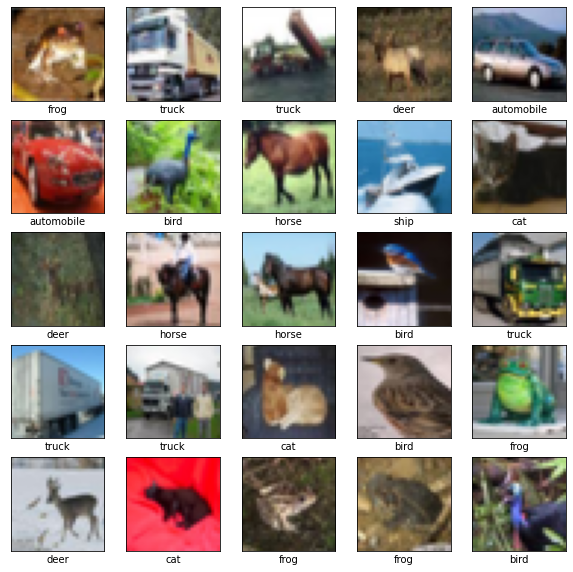

In [3]:
# Verify the data

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog','horse','ship','truck' ]

plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label[i][0]])
plt.show()

create the convolutional base

Here creating convolutional base using common pattren

A stack of Conv2D and MaxPooling2D layers

Input as the CNN takes tensorflow of Shape like image_height, image_width, color ignoring the batch size. 



In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3), activation = 
                        'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Here the output every Conv2D and MaxPooling2D layer is a 3D tensor of shape.

Add dense layers on top

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#here one or more Dense layers to perfrom classification
model.add(layers.Dense(10))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
# compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_img, train_label, epochs=10, 
                    validation_data=(test_img, test_label))

Epoch 1/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7586 - accuracy: 0.3493 - val_loss: 1.2465 - val_accuracy: 0.5524
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.2071 - accuracy: 0.5678 - val_loss: 1.1459 - val_accuracy: 0.5864
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0403 - accuracy: 0.6328 - val_loss: 1.0385 - val_accuracy: 0.6343
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9423 - accuracy: 0.6736 - val_loss: 1.0530 - val_accuracy: 0.6419
Epoch 5/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8517 - accuracy: 0.6983 - val_loss: 0.8929 - val_accuracy: 0.6883
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7827 - accuracy: 0.7262 - val_loss: 0.9443 - val_accuracy: 0.6823
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7336 - accuracy: 0.7432 - val_loss: 0.8721 -

313/313 - 4s - loss: 0.8921 - accuracy: 0.7033


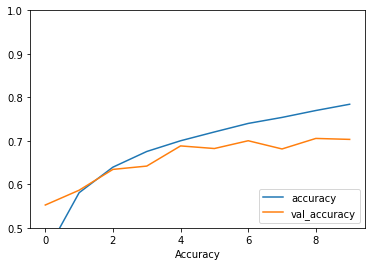

In [8]:
#Evaluate the model

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc = 'lower right')

test_loss, test_acc = model.evaluate(test_img, test_label, verbose = 2)


In [9]:
print(test_acc) # here CNN has achieved a test accuracy of over 70%, but if we increase epochs, test accuracy can increased

0.7032999992370605
